In [151]:
import pandas as pd
import numpy as np

# Import matplotlib and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Import plot_acf from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

In [166]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 76F5-E995

 Directory of C:\Users\Egor_Pilat\Desktop\MADE\HPC

10/10/2022  10:25 PM    <DIR>          .
10/10/2022  10:25 PM    <DIR>          ..
10/10/2022  10:25 PM    <DIR>          .ipynb_checkpoints
10/10/2022  10:25 PM            85,629 HW 1.ipynb
10/10/2022  05:06 PM            14,075 top500.json
10/10/2022  04:50 PM           122,539 TOP500_202206.xlsx
               3 File(s)        222,243 bytes
               3 Dir(s)  152,359,505,920 bytes free


## Задача 1 

In [152]:
js = pd.read_json("top500.json").T

In [153]:
js = js.iloc[1::2]
js['#1'] = js['#1'].map(lambda x: x[0])

In [154]:
js

,Sum,#1,#500
1993-11-01,"[1500.0, GFlop/s]",124.0,"[0.5, GFlop/s]"
1994-11-01,"[2700.0, GFlop/s]",170.0,"[1.2, GFlop/s]"
1995-11-01,"[4800.0, GFlop/s]",170.0,"[2.5, GFlop/s]"
1996-11-01,"[8000.0, GFlop/s]",368.2,"[4.6, GFlop/s]"
1997-11-01,"[16900.0, GFlop/s]",1300.0,"[9.5, GFlop/s]"
1998-11-01,"[29400.0, GFlop/s]",1300.0,"[17.1, GFlop/s]"
1999-11-01,"[50900.0, GFlop/s]",2400.0,"[33.1, GFlop/s]"
2000-11-01,"[88100.0, GFlop/s]",4900.0,"[55.3, GFlop/s]"
2001-11-01,"[135000.0, GFlop/s]",7200.0,"[94.3, GFlop/s]"
2002-11-01,"[291800.0, GFlop/s]",35900.0,"[195.8, GFlop/s]"


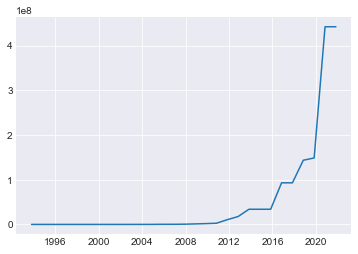

In [155]:
plt.plot(js["#1"]);

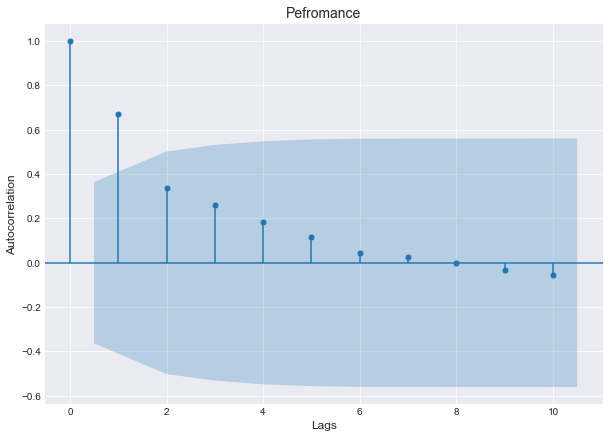

In [156]:
plt.rc("figure", figsize=(10, 7))
plot_acf(js['#1'], lags=10)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title('Pefromance', fontsize=14)
plt.show()

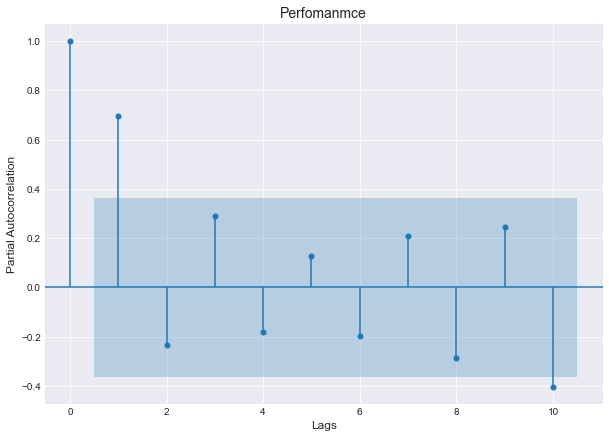

In [157]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(js['#1'], lags=10)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Partial Autocorrelation', fontsize=12)
plt.title('Perfomanmce', fontsize=14)
plt.show()

In [158]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(js['#1'])
print('p-value: %.2f' % result[1])

p-value: 0.00


In [159]:
from statsmodels.tsa.arima_model import ARIMA

# Train autoregression model of order 1
model_fit = ARIMA(js["#1"][:int(len(js)*0.90)], (1, 0, 0)).fit()
print(model_fit.params.round(2))

const       17923070.47
ar.L1.#1           1.00
dtype: float64


C:\Users\Egor_Pilat\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Egor_Pilat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

## $$ y(t) = y_{t-1} * 1 + 17923070.47 $$

In [160]:
pred_years = range(2022, 2026)
last_year = js.iloc[-1]["#1"]

for year in pred_years:
    pred = model_fit.params.const + last_year
    last_year = pred
    print(f"В {year} году ожидается производительность компьютера = {pred} GFlop/s")

В 2022 году ожидается производительность компьютера = 459923070.4692308 GFlop/s
В 2023 году ожидается производительность компьютера = 477846140.93846154 GFlop/s
В 2024 году ожидается производительность компьютера = 495769211.4076923 GFlop/s
В 2025 году ожидается производительность компьютера = 513692281.8769231 GFlop/s


### Задача 2

#### Суммарное конечное (полезное) потребление электроэнергии во всем мире (179 стран) за 2019 год - 22490 млрд. кВт∙ч

In [161]:
CAPACITY = 10 ** 9 * 22490
CAPACITY

22490000000000

In [162]:
df = pd.read_excel("TOP500_202206.xlsx")
df

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,...,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,NaN,59,1,Frontier,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",DOE/SC/Oak Ridge National Laboratory,HPE,United States,2021,...,AMD Instinct MI250X,64,AMD Milan,HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,North America,48553,180047
1,2,1.0,55,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,...,None,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,50831,179807
2,3,NaN,59,3,LUMI,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",EuroHPC/CSC,HPE,Finland,2022,...,AMD Instinct MI250X,64,AMD Milan,HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,Europe,50908,180048
3,4,2.0,51,1,Summit,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,48553,179397
4,5,3.0,51,3,Sierra,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,49763,179398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,461.0,51,115,Software Company (M) A6,"Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G E...",Hosting Services,Lenovo,United States,2018,...,None,20,Intel Xeon E5 (Broadwell),Lenovo C1040,Lenovo Cluster,Gigabit Ethernet,40G Ethernet,North America,50171,179346
496,497,462.0,51,116,Software Company (M) A4,"Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G E...",Hosting Services,Lenovo,United States,2018,...,None,20,Intel Xeon E5 (Broadwell),Lenovo C1040,Lenovo Cluster,Gigabit Ethernet,40G Ethernet,North America,50171,179347
497,498,463.0,51,117,Software Company (M) A3,"Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G E...",Hosting Services,Lenovo,United States,2018,...,None,20,Intel Xeon E5 (Broadwell),Lenovo C1040,Lenovo Cluster,Gigabit Ethernet,40G Ethernet,North America,50171,179348
498,499,464.0,51,118,Software Company (M) A2,"Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G E...",Hosting Services,Lenovo,United States,2017,...,None,20,Intel Xeon E5 (Broadwell),Lenovo C1040,Lenovo Cluster,Gigabit Ethernet,40G Ethernet,North America,50171,179349


### Возьмём числовые признаки  и используя метод ближайших соседей восстановим недостающие фичи.

In [163]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
numeric_df = df.select_dtypes(include=['float64', "int64"])
full_df = imputer.fit_transform(numeric_df)
power_col = list(numeric_df.columns).index("Power (kW)")

In [164]:
total_power_sum = full_df[:, power_col].sum()
ratio = total_power_sum / CAPACITY * 100
print(f"Сумма энергопотребления топ500={total_power_sum} кВт.\nТогда доля от всего мирового потребления={ratio}%")

Сумма энергопотребления топ500=716677.925 кВт.
Тогда доля от всего мирового потребления=3.186651511783015e-06%
